# Trabalho da segunda unidade de Probabilidade
Esse trabalho possui como objetivo análisar os dados referentes a pesquisa no Instituto Metrópole Digital (IMD).

**Componentes**:
- <a href="https://github.com/alvarofpp">Álvaro Ferreira Pires de Paiva</a>
  - Matrícula: 2016039162
  - E-mail: alvarofepipa@gmail.com
- <a href="https://github.com/davir8">Davi Rodrigues de Medeiros</a>
  - Matrícula: 20160143888
  - E-mail: davirodrigues8@gmail.com

## Dados
Os dados utilizados forma retirados do site de <a href="http://dados.ufrn.br/">dados abertos da UFRN</a>. Foram utilizados os seguintes dados:
- <a href="http://dados.ufrn.br/dataset/bolsistas-de-iniciacao-cientifica">Bolsistas de Iniciação Científica</a>
- <a href="http://dados.ufrn.br/dataset/discentes">Discentes</a>
- <a href="http://dados.ufrn.br/dataset/docentes">Docentes</a>
- <a href="http://dados.ufrn.br/dataset/pesquisadores">Pesquisadores</a>
- <a href="http://dados.ufrn.br/dataset/projetos-de-pesquisa">Projetos de pesquisa</a>


###### Sumário
- [Preparando o ambiente](#ambiente)
- [Preparando o ambiente](#ambiente)
- [Tratamento dos dados](#tratamento)
  - [Vinculação](#vinculacao)
- [Análise](#analise)
  - [Discentes](#discentes)
  - [Docentes e pesquisa](#docentes)

## <a id="ambiente">Preparando o ambiente</a>
Nessa seção, iremos declarar as variáveis globais que iremos utilizar durante esse notebook, importar as libs necessárias e preparar os arquivos que temos para podermos utilizá-los nas seções seguintes.

Vale ressaltar que para o jupyter notebook funcionar corretamente, precisaremos instalar algumas dependências a ele, sendo elas:
- `conda install -c anaconda seaborn` ([Saiba mais](https://seaborn.pydata.org/))
- `conda install -c conda-forge wordcloud` ([Saiba mais](https://github.com/amueller/word_cloud))

In [1]:
# Imports
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Caminhos dos arquivos
path_files = "files/"
path_discentes = path_files + "discentes/"

# Ids
id_imd = 6069
id_dimap = 125

A seguir, iremos filtrar os **discentes** para, exclusivamente, os que ingressaram no curso de Tecnologia da Informação.

In [3]:
# Iremos pegar todos os discentes e filtrar-los em apenas os discentes do IMD
df_ingressantes_imd = pd.DataFrame()

for root, dirs, files in os.walk(path_discentes):
    for filename in files:
        print(root + filename)
        df_ingressantes = pd.read_csv((root + filename), sep=';')
        df_ingressantes_filter = df_ingressantes[df_ingressantes.nome_curso == "TECNOLOGIA DA INFORMAÇÃO"]
        df_ingressantes_imd = pd.concat([df_ingressantes_imd, df_ingressantes_filter])

files/discentes/discentes-2014
files/discentes/discentes-2018
files/discentes/discentes-2016
files/discentes/discentes-2017
files/discentes/discentes-2013
files/discentes/discentes-2015


In [4]:
# Remove as colunas que não nos servem para nada
df_ingressantes_imd = df_ingressantes_imd.drop(columns=['sigla_nivel_ensino', 'nivel_ensino',
                                  'id_curso', 'nome_curso',
                                  'id_unidade', 'nome_unidade',
                                 'id_unidade_gestora', 'nome_unidade_gestora'])

# Converte colunas que são float, mas deveriam ser double
df_ingressantes_imd.matricula = df_ingressantes_imd.matricula.astype('int64')
df_ingressantes_imd.periodo_ingresso = df_ingressantes_imd.periodo_ingresso.astype('int64')

In [5]:
df_ingressantes_imd.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,modalidade_educacao
56,2014065430,ADAUTO VIEIRA DE ARAÚJO GUEDES,2014,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
135,2014052728,ADRIANA ARAUJO DE ALBUQUERQUE ANDRADE,2014,1,SiSU,REGULAR,CANCELADO,PRESENCIAL
364,2014065270,ALAN VITOR COSTA DE OLIVEIRA,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL
582,2014023717,ALEXANDRE NELSON ALVES DE CARVALHO JUNIOR,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL
594,2014056754,ALEXANDRE VITOR CUNHA DE MEDEIROS,2014,1,SiSU,REGULAR,CANCELADO,PRESENCIAL


In [6]:
# Salvamos o arquivo
df_ingressantes_imd.to_csv('data/discentes_imd.csv')

Agora iremos filtrar os **docentes** para, exclusivamente, os docentes que possuem como unidade de lotação o Instituto Metrópole Digital (IMD) ou o Departamento de Informática e Matemática Aplicada (DIMAP).

In [7]:
# Todos os docentes
df_docentes = pd.read_csv(('files/docentes.csv'), sep=';')

# Filtramos para os que são do IMD
df_docentes_imd = df_docentes[df_docentes.id_unidade_lotacao.isin([id_imd,id_dimap])]

# Remove as colunas que não nos servem para nada
df_docentes_imd = df_docentes_imd.drop(columns=['siape', 'Unnamed: 11',
                                  'id_unidade_lotacao', 'lotacao'])

df_docentes_imd.head()

,id_servidor,nome,formacao,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,admissao
13,5757141,ALUIZIO FERREIRA DA ROCHA NETO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2015-01-28 00:00:00
15,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-11 00:00:00
25,5756955,ANDRE LUIZ DE SOUZA BRITO,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,2014-07-15 00:00:00
33,5757540,ANTONIO IGOR SILVA DE OLIVEIRA,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DI ...,2015-05-26 00:00:00
34,5757618,ANTONIO WALLACE ANTUNES SOARES,MESTRADO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DI ...,2015-07-31 00:00:00


In [8]:
# Salvamos o arquivo
df_docentes_imd.to_csv('data/docentes_imd.csv')

Agora iremos filtrar os **bolsista de iniciação científica** para, exclusivamente, os discentes do curso de Tecnologia da Informação.

In [9]:
# Todos os bolsistas de iniciação científica
df_bolsistas = pd.read_csv(('files/bolsistas-de-iniciacao-cientifica.csv'), sep=';')

# Filtramos para os que são do IMD
df_bolsistas_imd = df_bolsistas[df_bolsistas.id_unidade == id_imd]

# Remove as colunas que não nos servem para nada
df_bolsistas_imd = df_bolsistas_imd.drop(columns=['Unnamed: 20',
                                  'id_unidade', 'unidade'])

df_bolsistas_imd.head()

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status
768,657578,2014068307,ALICE GABRIELA ALVES DE SALES FARIAS,Modulo de comunicação para sistema Embarcado d...,PIT12872-2016,117151961,2016,5756871,EDUARDO NOGUEIRA CUNHA,Iniciação Científica (IC),VOLUNTÁRIO,Monitoramento Residencial,NaN,NaN,2016-2017,2016-08-10,NaN,PENDENTE DE RELATORIO
1030,693925,2015041845,ALLAN VALDIVINO GONÇALVES,Detecção de Code Smells em sistemas Python,PIT14429-2017,123478649,2017,5757883,EIJI ADACHI MEDEIROS BARBOSA,Iniciação Científica (IC),VOLUNTÁRIO,Engenharia de Software,NaN,NaN,2017-2018,2017-08-02,NaN,EM ANDAMENTO
1294,693430,2015032710,AMANDA MARIA DOMINGOS DE OLIVEIRA,OBJETOS DE APRENDIZAGEM PARA O ENSINO DE MATEM...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2017-2018,2017-08-05,NaN,EM ANDAMENTO
1295,693430,2015032710,AMANDA MARIA DOMINGOS DE OLIVEIRA,Objetos de aprendizagem para o ensino de Matem...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2016-2017,2016-08-06,NaN,FINALIZADO
1658,642002,2014023889,ANA CLAUDIA NUNES SILVA,Objetos de aprendizagem para o ensino de Matem...,PIT12982-2016,117612151,2016,5757088,DENNYS LEITE MAIA,Iniciação Tecnológica (IT),PIBITI UFRN,Formação de professores de Matemática,NaN,NaN,2016-2017,2016-08-08,NaN,FINALIZADO


In [10]:
# Salvamos o arquivo
df_bolsistas_imd.to_csv('data/bolsistas_imd.csv')

Agora iremos pegar os **projetos de pesquisa** realizados pelos professores do IMD ou DIMAP.

In [11]:
# Todos os projetos de pesquisa
df_projetos_pesquisa = pd.read_csv('files/projetos-de-pesquisa.csv', sep=';')
df_projetos_pesquisa = df_projetos_pesquisa[~df_projetos_pesquisa.id_coordenador.isnull()]

# Remove as colunas que não nos servem para nada
df_projetos_pesquisa = df_projetos_pesquisa.drop(columns=['Unnamed: 20'])

# Converte o tipo da coluna
df_projetos_pesquisa.id_coordenador = df_projetos_pesquisa.id_coordenador.astype('int64')

df_projetos_pesquisa.head()

,id_projeto_pesquisa,codigo_projeto,titulo,palavras_chave,id_projeto,ano,data_inicio,data_fim,situacao,tipo_projeto,categoria_projeto,id_unidade,unidade,id_coordenador,coordenador,edital,id_grupo_pesquisa,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq
0,124784693,PVB14909-2018,Desenvolvimento de zeóitas de alta acessibilid...,Alta acessibilidade; MCM22; zeólitas,91815273,2018,2018-01-01,2019-12-31,EM EXECUÇÃO,EXTERNO,Pesquisa Científica,6025,INSTITUTO DE QUÍMICA,5753414,SIBELE BERENICE CASTELLA PERGHER,NaN,116359675,Laboratório de Peneiras Moleculares - LABPEMOL,Zeólitas,Físico-Química
1,124089967,PVB14922-2018,Processos e Propriedades em Reservatórios Carb...,"Carbonatos, Reservatórios, Fraturados,",91814641,2018,2018-01-04,2022-01-03,EM EXECUÇÃO,EXTERNO,Pesquisa Científica,123,DEPARTAMENTO DE GEOLOGIA,21737,FRANCISCO HILARIO REGO BEZERRA,NaN,103337635,SISTEMAS PETROLÍFEROS,Estudos Geológicos das Bacias Sedimentares,Sedimentologia
2,127435249,PVB14987-2018,Tecnologia Sustentável para fins de dessaliniz...,"nanofiltro, dessalinização, água, nanoestruturas",91816855,2018,2018-01-01,2020-12-31,EM EXECUÇÃO,EXTERNO,Inovação,121,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,26026,CARLOS CHESMAN DE ARAUJO FEITOSA,NaN,89008515,Nanoestruturas magnéticas e semicondutoras,Transporte em nanoestruturas,"Metrologia, Técnicas Gerais de Laboratório, Si..."
3,127784920,PVB14996-2018,DESENVOLVIMENTO DE PROTOCOLO DE AVALIAÇÃO AMBI...,"Erosao costeira, estratigrafia, sedimentologia",91817237,2018,2018-01-15,2018-10-14,EM EXECUÇÃO,EXTERNO,Inovação,123,DEPARTAMENTO DE GEOLOGIA,26059,HELENICE VITAL,NaN,911656,Ciências do Mar e Ambientais,Dinamica Costeira e Plataformal;Evolução coste...,Geologia Ambiental
4,127876188,PVB14998-2018,Sismologia de fonte passiva aplicado a bacias ...,"Bacias sedimentares, Nordeste do Brasil, Sismo...",91817275,2018,2018-04-01,2021-03-31,EM EXECUÇÃO,EXTERNO,Pesquisa Científica,4894,DEPARTAMENTO DE GEOFÍSICA,5754275,JORDI JULIA CASAS,NaN,97193555,Sismologia,Processamento de sinais sismológicos,Sismologia


In [12]:
# Salvamos o arquivo
df_projetos_pesquisa.to_csv('data/projetos.csv')

Agora iremos pegar os **pesquisadores** vinculados ao IMD ou ao DIMAP.

In [13]:
# Todos os pesquisadores
df_pesquisadores = pd.read_csv('files/pesquisadores.csv', sep=';')

# Filtramos para os que são do IMD
df_pesquisadores = df_pesquisadores[df_pesquisadores.id_unidade.isin([id_imd,id_dimap])]

# Remove as colunas que não nos servem para nada
df_pesquisadores = df_pesquisadores.drop(columns=['Unnamed: 9'])

df_pesquisadores.head()

,id_servidor,nome,id_unidade,unidade,id_centro,centro,coordenador,internos,externos
86,5757141,ALUIZIO FERREIRA DA ROCHA NETO,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,1,1
89,5756816,ALYSON MATHEUS DE CARVALHO SOUZA,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,2,0
138,5755819,ANDERSON PAIVA CRUZ,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,0,0,1
157,24949,ANDRE MAURICIO CUNHA CAMPOS,125,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,0,2,0
183,5756592,ANTONIO CARLOS GAY THOME,125,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,0,0,1


In [14]:
# Salvamos o arquivo
df_pesquisadores.to_csv('data/pesquisadores_imd.csv')

## <a id="tratamento">Tratamento dos dados</a>
Nessa seção, iremos tratar os dados de arquivos diferentes, de forma que iremos conseguir juntar dados de multiplos arquivos em um só, a fim de facilitar as análises que podemos realizar posteriormente.

### <a id="vinculacao">Vinculação</a>
Aqui iremos vincular diferentes arquivos de dados, a fim de gerarmos arquivos finais para facilitar a exibição de gráficos e afins.

Agora iremos fazer o merge com as informações dos bolsista de iniciação científica e dos discentes do Instituto Metrópole Digital.

In [15]:
# Merge entre os discentes e os bolsistas do imd utilizando como base a coluna matricula
df_discentes_bolsistas = pd.merge(df_ingressantes_imd, df_bolsistas_imd, on='matricula')

df_discentes_bolsistas.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status_x,modalidade_educacao,id_discente,discente,...,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status_y
0,2014065216,BRENO WESLEY BATISTA DE ARAÚJO,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL,653443,BRENO WESLEY BATISTA DE ARAÚJO,...,EUGENIO PACCELLI AGUIAR FREIRE,Iniciação Tecnológica (IT),PROPESQ,Oralidade digital na educação,115017057.0,Grupo Interdisciplinar de Estudos e Pesquisas ...,2015-2016 Propesq,2015-10-03,2016-04-27 00:00:00,FINALIZADO
1,2014026450,DEBORA EMILI COSTA OLIVEIRA,2014,1,SiSU,REGULAR,CONCLUÍDO,PRESENCIAL,642409,DEBORA EMILI COSTA OLIVEIRA,...,ISABEL DILLMANN NUNES,Iniciação Tecnológica (IT),PIBITI UFRN,Análise de Dados Educacionais,125841829.0,Ciência Cognitiva e de Dados,2016-2017,2016-12-26,NaN,FINALIZADO
2,2014048977,PAULO SERGIO SILVA DE MENDONÇA,2014,1,SiSU,REGULAR,ATIVO,PRESENCIAL,645253,PAULO SERGIO SILVA DE MENDONÇA,...,ISABEL DILLMANN NUNES,Iniciação Científica (IC),VOLUNTÁRIO,Análise de Dados Educacionais,125841829.0,Ciência Cognitiva e de Dados,2016-2017,2016-08-08,NaN,FINALIZADO
3,2014025103,PITAGORAS DE AZEVEDO ALVES SOBRINHO,2014,1,SiSU,REGULAR,ATIVO - FORMANDO,PRESENCIAL,642602,PITAGORAS DE AZEVEDO ALVES SOBRINHO,...,JORGE ESTEFANO SANTANA DE SOUZA,Iniciação Científica (IC),PIBIC CNPq,Bioinformática no desenvolvimento de interface...,NaN,NaN,2017-2018,2017-08-02,NaN,EM ANDAMENTO
4,2014025103,PITAGORAS DE AZEVEDO ALVES SOBRINHO,2014,1,SiSU,REGULAR,ATIVO - FORMANDO,PRESENCIAL,642602,PITAGORAS DE AZEVEDO ALVES SOBRINHO,...,JORGE ESTEFANO SANTANA DE SOUZA,Iniciação Científica (IC),PIBIC CNPq,Bioinformática no desenvolvimento de interface...,NaN,NaN,2016-2017,2016-08-06,NaN,FINALIZADO


In [16]:
# Salvamos o arquivo
df_discentes_bolsistas.to_csv('data/discentes_bolsistas_imd.csv')

## <a id="analise">Análise</a>
Nessa seção, iremos realizar algumas análises dos dados.

In [17]:
sns.set()
sns.set_context("notebook")

### <a id="docentes">Docentes e pesquisa</a>
- Qual a quantidade de docentes (do IMD e DIMAP) que são e não considerados pesquisadores?
- Qual a formação dos docentes que desenvolvem pesquisa?
- Quais são as principais áreas de conhecimento que os docentes desenvolvem projetos de pesquisa?
- Quais palavras mais aparecem nas palavras chaves das pesquisas realizadas?

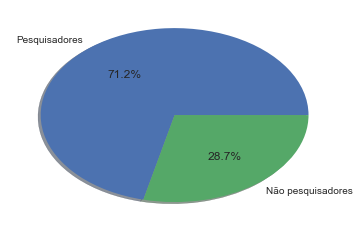

In [18]:
# Qual a quantidade de docentes (do IMD e DIMAP) que são e não considerados pesquisadores?

# Primeiro pegamos a quantidade de pesquisadores e 
# depois a diferença entre docentes do IMD e DIMAP no total e os que são pesquisadores
piePesquisadores = {
    'Pesquisadores' : len(df_pesquisadores.id_servidor.values),
    'Não pesquisadores' : len(list(set(df_docentes_imd.id_servidor.values) - set(df_pesquisadores.id_servidor.values)))
}

# Definimos as caracteristicas do gráfico pie e mostramos
plt.pie(list(piePesquisadores.values()), labels=list(piePesquisadores.keys()),
        autopct='%1.1f%%', shadow=True);
plt.show()

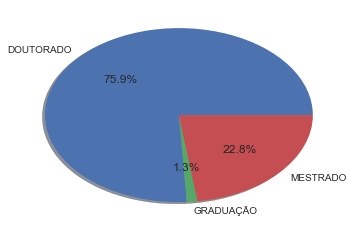

In [19]:
# Qual a formação dos docentes que desenvolvem pesquisa?
formacoes = dict(df_docentes_imd.groupby('formacao')['id_servidor'].count())

# Definimos as caracteristicas do gráfico pie e mostramos
plt.pie(list(formacoes.values()), labels=list(formacoes.keys()),
        autopct='%1.1f%%', shadow=True);
plt.show()

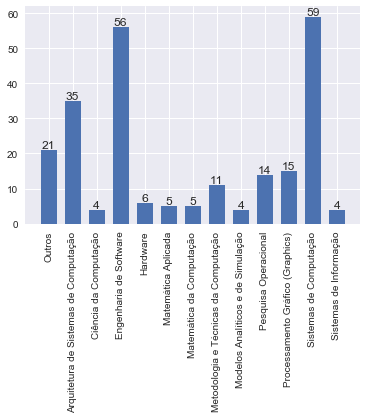

In [20]:
# Quais são as principais áreas de conhecimento que os docentes desenvolvem projetos de pesquisa?

# Pegamos os projetos de pesquisa desenvolvidos pelos servidores do IMD e DIMAP
df_pp_servidor = df_projetos_pesquisa[df_projetos_pesquisa['id_coordenador'].isin(df_pesquisadores.id_servidor.values)]

# Fazemos uma contagem da quantidade de projetos por área de conhecimento do CNPQ
pa_count = dict(df_pp_servidor.groupby('area_conhecimento_cnpq')['id_projeto_pesquisa'].count())

# Juntamos as áreas de conhecimento que possuem até 3 projetos de pesquisa registrados
pesquisa_areas = { 'Outros' : 0 }
for area in pa_count:
    if pa_count[area] <= 3:
        pesquisa_areas['Outros'] += pa_count[area]
    else:
        pesquisa_areas[area] = pa_count[area]

# Caracteristicas do gráfico de barra
plt.bar(list(pesquisa_areas.keys()), list(pesquisa_areas.values()), 1/1.5, align="center")

# Rotação dos rótulos do eixo X
plt.xticks(rotation=90)

# Texto em cima de cada barra
for tema in pesquisa_areas:
    plt.text(tema, (pesquisa_areas[tema]+0.5), str(pesquisa_areas[tema]), horizontalalignment='center')

plt.show()

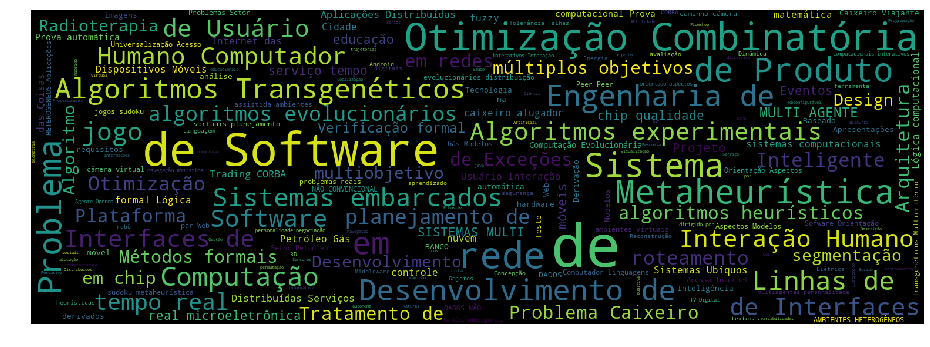

In [21]:
# Quais palavras mais aparecem nas palavras chaves das pesquisas realizadas?
palavras = ""

for palavra_chave in df_pp_servidor.palavras_chave:
    palavras = palavras + " " + palavra_chave

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(palavras)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()